# Steps In this Notebook

* EDA

* Train-Test Split

* Different Regression Algorithms

* 1. Linear
* 2. Ridge
* 3. Lasso
* 4. ELasticNet
* 5. Random Forest
* 6. SVM

* Comparasion of these Algorithms

* Verifying Assumptions for Linear Regression
* 1. Linear relationship between features and targets
* 2. Little or no Multicollinearity between the features
* 3. Homoscedasticity Assumption
* 4. Normal distribution of error terms
* 5. Little or No autocorrelation in the residuals

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
from sklearn.datasets import load_boston 
boston = load_boston() 

# Data Description and Basic EDA

In [4]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
data=pd.DataFrame(boston.data)

In [6]:
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data.columns = boston.feature_names 

In [8]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
data['price']=boston.target

In [10]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.shape

(506, 14)

In [12]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
price      float64
dtype: object

If your data contains categorical attributes , you should encode them before applying Regression model. 

In [13]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

# Preparing Data for the Model : Split into Features and Lables 

In [14]:
x=boston.data

In [15]:
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
y=boston.target

# Train Test Set Split

In [17]:
xtrain , xtest , ytrain, ytest =train_test_split(x,y,test_size=0.2,random_state=42 )

In [18]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


# Different Regression Types
* 1- Linear

* 2- Ridge

* 3- Lasso

* 4- ElasticNet

* 5- Random Forest

* 6- Support Vector

# Linear Regressor

Mean Absolute Error: 3.18909196588785
Mean Squared Error: 24.29111947497362
Root Mean Squared Error: 4.9286021826653466
Regressor Coefficients:
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]


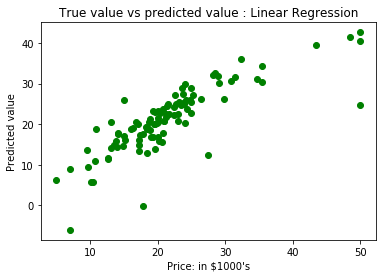

In [19]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_pred = regressor.predict(xtest) 

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))
print("Regressor Coefficients:\n",regressor.coef_)

plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

,Actual,Predicted
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880


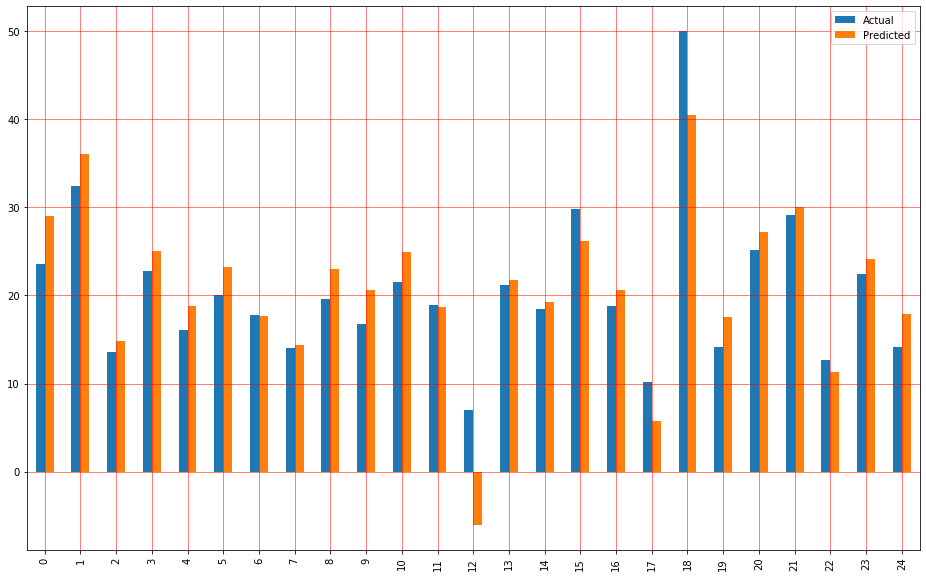

In [20]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten()})
display(df.head(5))
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid()
plt.show()

# Ridge Regressor

Mean Absolute Error: 3.149302938467155
Mean Squared Error: 24.37760980875639
Root Mean Squared Error: 4.93736871306533
Regressor Coefficients:
 [-1.10558458e-01  3.14754936e-02  1.92349682e-02  2.64289199e+00
 -1.22740970e+01  4.46102913e+00 -1.01408357e-02 -1.37755922e+00
  2.53447202e-01 -1.11693299e-02 -8.59180851e-01  1.25397346e-02
 -5.17928658e-01]


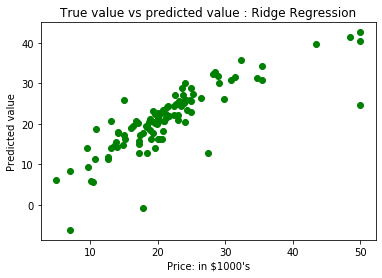

In [21]:
from sklearn.linear_model import Ridge 
rr = Ridge(alpha=0.5,solver='auto') 
rr.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_predrr = rr.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_predrr))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_predrr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_predrr)))
print("Regressor Coefficients:\n",rr.coef_)

plt.scatter(ytest, y_predrr, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Ridge Regression") 
plt.show() 

,Actual,Predicted
0,23.6,28.798883
1,32.4,35.824373
2,13.6,14.388864
3,22.8,24.867015
4,16.1,18.995732


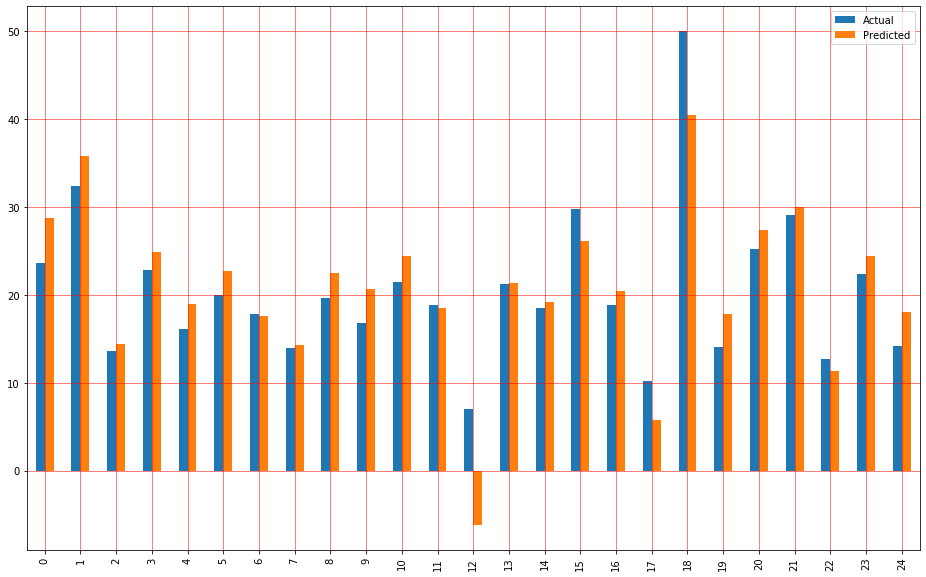

In [22]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_predrr.flatten()})
display(df.head(5))
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Lasso Regressor 

Mean Absolute Error: 3.2535397673681636
Mean Squared Error: 24.4094897612997
Root Mean Squared Error: 4.94059609372186
Regressor Coefficients:
 [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]


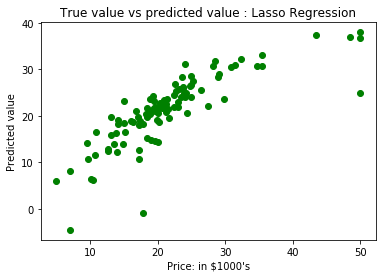

In [23]:
from sklearn.linear_model import Lasso 
lr = Lasso(alpha=1.0,selection='cyclic')
lr.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_predlr = lr.predict(xtest)


print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_predlr))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_predlr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_predlr)))
print("Regressor Coefficients:\n",lr.coef_)

plt.scatter(ytest, y_predlr, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Lasso Regression") 
plt.show() 

,Actual,Predicted
0,23.6,28.466880
1,32.4,32.144851
2,13.6,13.886900
3,22.8,25.383529
4,16.1,19.003386


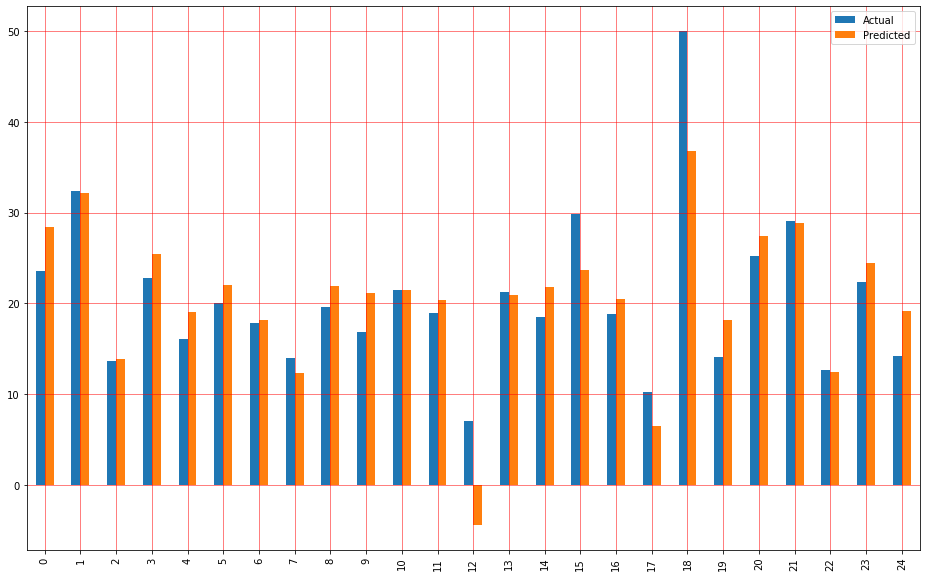

In [42]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_predlr.flatten()})
display(df.head(5))
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Fittiting ElasticNet Regressor 

Mean Absolute Error: 3.2063876510648566
Mean Squared Error: 23.589338513345233
Root Mean Squared Error: 4.856885680489632
Regressor Coefficients:
 [-0.10308623  0.03809409 -0.03419184  0.         -0.          1.72534241
  0.01033011 -0.94538272  0.29340331 -0.01466521 -0.79595434  0.01149024
 -0.74009168]


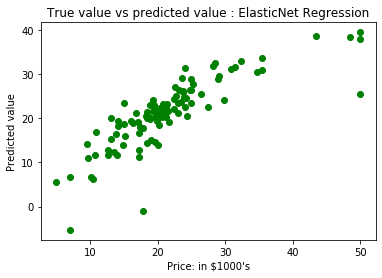

In [43]:
from sklearn.linear_model import ElasticNet 
enr = ElasticNet(alpha=0.6,l1_ratio=0.4,selection='cyclic')
enr.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_predenr = enr.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_predenr))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_predenr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_predenr)))
print("Regressor Coefficients:\n",enr.coef_)

plt.scatter(ytest, y_predenr, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : ElasticNet Regression") 
plt.show() 

In [30]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_predenr.flatten()})
df.head(5)

,Actual,Predicted
0,23.6,29.040892
1,32.4,32.816218
2,13.6,12.459659
3,22.8,24.976742
4,16.1,19.254901


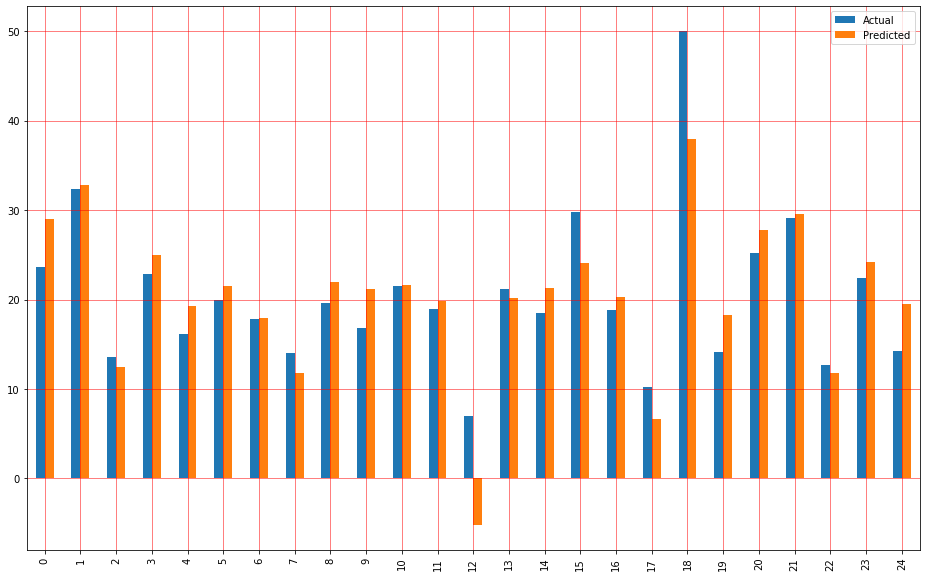

In [31]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest Regressor 

Mean Absolute Error: 2.0302941176470592
Mean Squared Error: 7.901706941176477
Root Mean Squared Error: 2.8109974993187876
Regressor Score:
 0.9780200159605286


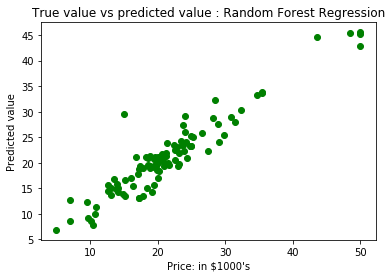

In [45]:
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)# Train the model on training data
rf.fit(xtrain , ytrain );
y_predrf = rf.predict(xtest) 

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_predrf))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_predrf))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_predrf)))
print("Regressor Score:\n",rf.score(xtrain,ytrain))


plt.scatter(ytest, y_predrf, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Random Forest Regression") 
plt.show() 

,Actual,Predicted
0,23.6,23.486
1,32.4,30.414
2,13.6,16.906
3,22.8,23.088
4,16.1,17.082


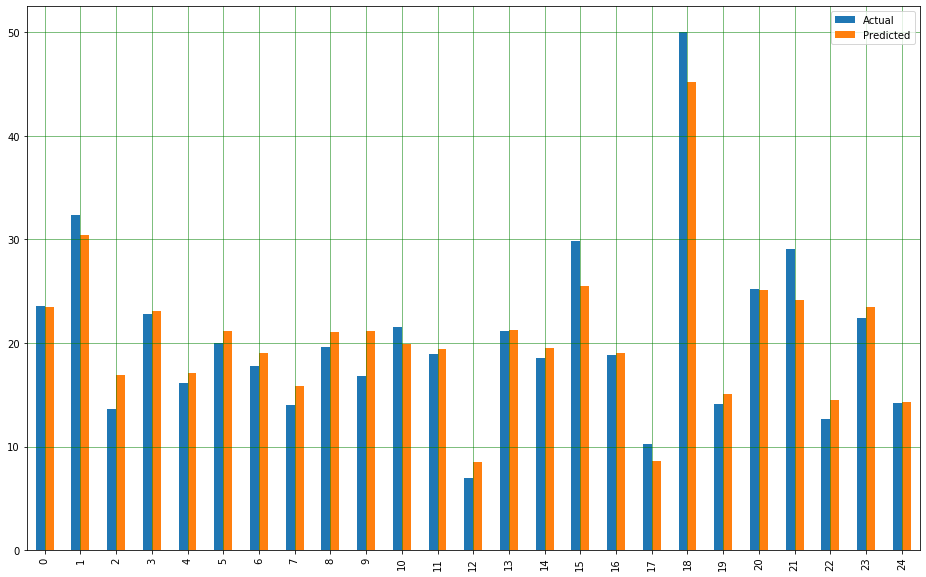

In [47]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_predrf.flatten()})
display(df.head(5))
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Fitting SVM Regressor

Mean Absolute Error: 3.1404341259560358
Mean Squared Error: 29.435908618391455
Root Mean Squared Error: 5.425486947582812
Regressor Score:
 0.7152142539290571


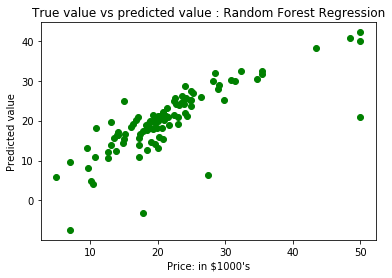

In [49]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(xtrain,ytrain)
y_predsvm = svr.predict(xtest)

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_predsvm))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_predsvm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_predsvm)))
print("Regressor Score:\n",svr.score(xtrain,ytrain))

plt.scatter(ytest, y_predsvm, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Random Forest Regression") 
plt.show() 

,Actual,Predicted
0,23.6,28.996724
1,32.4,36.025565
2,13.6,14.816944
3,22.8,25.031979
4,16.1,18.769880


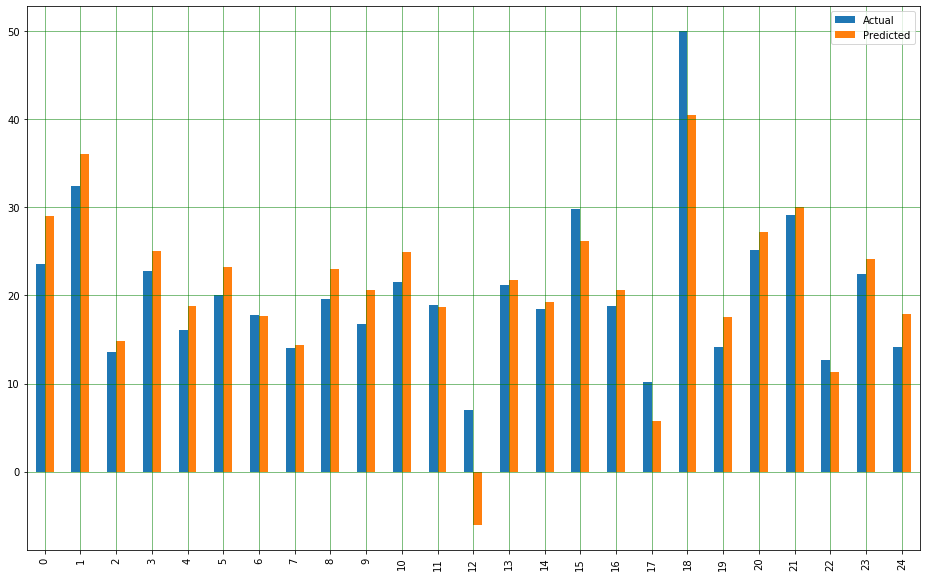

In [50]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten()})
display(df.head(5))
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Comparasion of Regression Models

In [54]:
algos=["Linear","Ridge","Lasso","ElasticNet","Random Forest","Support Vector Machine"]

mae=[metrics.mean_absolute_error(ytest, y_pred),metrics.mean_absolute_error(ytest, y_predrr),
     metrics.mean_absolute_error(ytest, y_predlr),metrics.mean_absolute_error(ytest, y_predenr)
     ,metrics.mean_absolute_error(ytest, y_predrf),metrics.mean_absolute_error(ytest, y_predsvm)]

mse=[metrics.mean_squared_error(ytest, y_pred),metrics.mean_squared_error(ytest, y_predrr),
     metrics.mean_squared_error(ytest, y_predlr),metrics.mean_squared_error(ytest, y_predenr),
     metrics.mean_squared_error(ytest, y_predrf),metrics.mean_squared_error(ytest, y_predsvm)]

rmse=[ np.sqrt(metrics.mean_squared_error(ytest, y_pred)), np.sqrt(metrics.mean_squared_error(ytest, y_predrr)),
       np.sqrt(metrics.mean_squared_error(ytest, y_predlr)), np.sqrt(metrics.mean_squared_error(ytest, y_predenr)),
       np.sqrt(metrics.mean_squared_error(ytest, y_predrf)), np.sqrt(metrics.mean_squared_error(ytest, y_predsvm))]


comp={"Algorithms":algos,"Mean Absolute Error":mae,"Mean Squared Error":mse,"Root Mean Squared Error":rmse}
compdf=pd.DataFrame(comp)
print("______________________Different Types of Regression Moddels______________________")
display(compdf.sort_values(by=["Root Mean Squared Error","Mean Squared Error"], ascending=True))


______________________Different Types of Regression Moddels______________________


,Algorithms,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
4,Random Forest,2.030294,7.901707,2.810997
3,ElasticNet,3.206388,23.589339,4.856886
0,Linear,3.189092,24.291119,4.928602
1,Ridge,3.149303,24.377610,4.937369
2,Lasso,3.253540,24.409490,4.940596
5,Support Vector Machine,3.140434,29.435909,5.425487


# Verifying Assumptions for Linear Regression

1. Linear relationship between features and targets
2. Little or no Multicollinearity between the features
3. Homoscedasticity Assumption
4. Normal distribution of error terms
5. Little or No autocorrelation in the residuals

In [46]:
data2 = data[['DIS','CHAS','RM','RAD','B','price']]

##### 1. Linear relationship between features and targets

Text(0.5, 1.0, 'Scatter Plot')

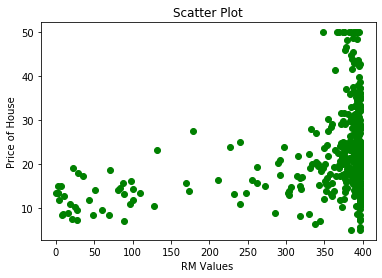

In [47]:
plt.scatter(data2['B'],data2['price'], c = 'green') 
plt.xlabel("RM Values ") 
plt.ylabel("Price of House") 
plt.title("Scatter Plot")

 #####  2. Little or no Multicollinearity between the features

In [48]:
features=data2[['DIS','CHAS','RM','RAD','B',]]

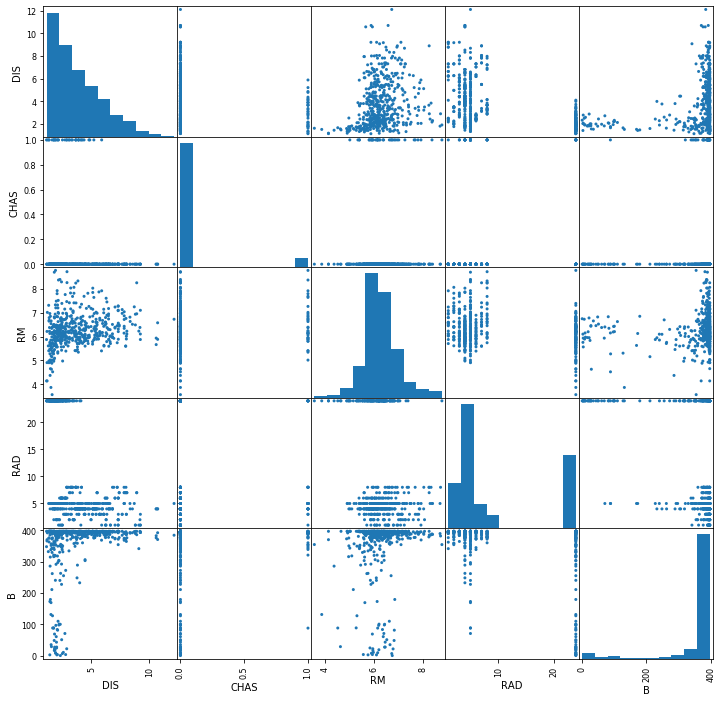

In [52]:
spm = pd.plotting.scatter_matrix(features, alpha=1, figsize=(12,12), diagonal='hist')

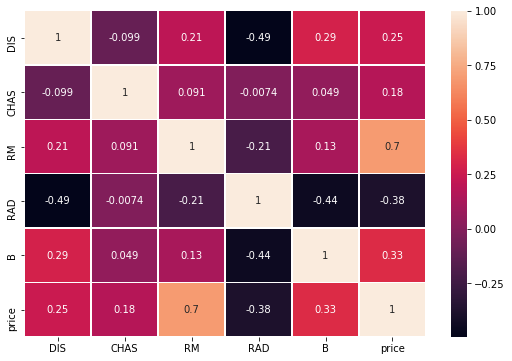

In [53]:
f,ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data2.corr(), annot=True, linewidths=.5, ax=ax)

##### 3.Homoscedasticity Assumption:(https://anaconda.org/DistrictDataLabs/yellowbrick)

In [144]:
# ! pip install yellowbrick

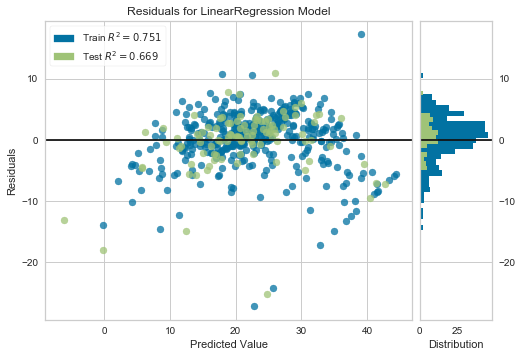

In [62]:
from yellowbrick.regressor import ResidualsPlot
Lr=LinearRegression()
visualizer=ResidualsPlot(Lr)
visualizer.fit(xtrain,ytrain)
visualizer.score(xtest,ytest)
visualizer.show()

##### 4. Normal distribution of error terms:


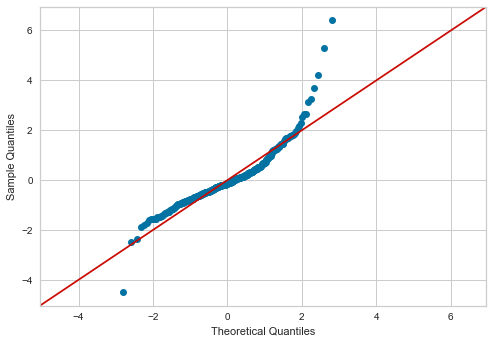

In [63]:
import statsmodels.api as sm
mod_fit=sm.OLS(ytrain,xtrain).fit()
res=mod_fit.resid
fig=sm.qqplot(res,fit=True,line='45')
plt.show()

##### 5. Little or No autocorrelation in the residuals

In [64]:
model=sm.OLS(ytrain,xtrain)
results=model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              755.7
Date:                Fri, 07 Feb 2020   Prob (F-statistic):                   1.13e-267
Time:                        19:13:36   Log-Likelihood:                         -1208.5
No. Observations:                 404   AIC:                                      2443.
Df Residuals:                     391   BIC:                                      2495.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------